In [1]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.interpolate import CubicSpline

In [2]:
def LUdec3(c, d, e):
    n = len(d)
    for k in range(1,n-1):
        lambda1 = c[k-1] / d[k-1]
        d[k] = d[k] - lambda1*e[k-1]
        c[k-1] = lambda1
        return [c, d, e]

In [3]:
def LUsol3(c, d, e, b):
    n = len(d)
    for k in range(1,n-1):
        b[k] = b[k] - c[k-1]*b[k-1]
        
    b[n-1] = b[n-1]/d[n-1]
    
    for k in range(n-2, -1, -1):
        b[k] = (b[k] - e[k]*b[k+1])/d[k]
    
    x = b
    return x

In [4]:
def splineCurv(xData,yData):
    n = len(xData)     
    
    c = np.zeros((n-1))
    d = np.ones((n))
    e = np.zeros((n-1))
    k = np.zeros((n))
    """
    c = np.zeros((1,n-1))
    d = np.ones((1,n))
    e = np.zeros((1,n-1))
    k = np.zeros((1,n))
    """       
    # Calculations
    c[0:n-3] = xData[0:n-3] - xData[1:n-2]
    d[1:n-2] = 2 * (xData[0:n-3] - xData[2:n-1])
    e[1:n-2] = xData[1:n-2] - xData[2:n-1]
    #k[1:n-2] = 6*(yData[0:n-3] - yData[1:n-2])/(xData[0:n-3] - xData[1:n-2]) - 6*(yData[1:n-2] - yData[2:n-1])/(xData[1:n-2] - xData[2:n-1])
    k[1:n-2] = 6*np.true_divide((yData[0:n-3] - yData[1:n-2]), (xData[0:n-3] - xData[1:n-2])) - 6*np.true_divide((yData[1:n-2] - yData[2:n-1]), (xData[1:n-2] - xData[2:n-1]))
    [c, d, e] = LUdec3(c, d, e)
    k = LUsol3(c, d, e, k)
    return k

In [5]:
def findSeg(xData,x):
    iLeft=1; iRight=len(xData)
    while 1:
        if (iRight - iLeft) <= 1:
            i = iLeft; 
            return i
        i = int(np.fix(((iLeft + iRight)/2)))        
        if x < xData[i-1]:
            iRight = i
        else:
            iLeft =i
    

In [6]:
def splineEval(xData, yData, k, x):
    i = findSeg(xData, x)
    h = xData[i-1] - xData[i]
    y = np.array(((x - xData[i])**3/h - (x - xData[i])*h)*k[i-1]/6.0 - ((x - xData[i-1])**3/h - (x- xData[i-1])*h)*k[i]/6.0 + yData[i-1]*(x - xData[i])/h - yData[i]*(x - xData[i-1])/h)
    return y

In [8]:
xData = np.array([0.9, 1.3, 1.9, 2.1, 2.6, 3.0, 3.9, 4.4, 4.7, 5.0, 6.0, 7.0, 8.0, 9.2, 10.5, 11.3, 11.6, 12.0, 12.6, 13.0, 13.3], dtype=np.float64)
yData = np.array([1.3, 1.5, 1.85, 2.1, 2.6, 2.7, 2.4, 2.15, 2.05, 2.1, 2.25, 2.3, 2.25, 1.95, 1.4, 0.9, 0.7, 0.6, 0.5, 0.4, 0.25], dtype=np.float64)

x = np.arange(0.9, 13.3, 0.01)
a = np.ones_like(x)
k = splineCurv(xData, yData)
for i in range(len(x)):
    a[i] = splineEval(xData, yData, k, x[i])

Text(0.5,1,'My own Plot')

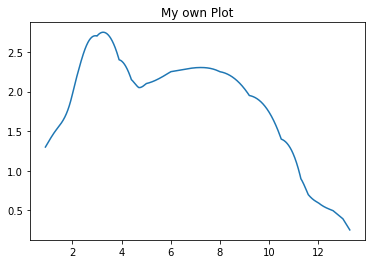

In [9]:
plt.plot(x,a)
plt.title("My own Plot")

Text(0.5,1,'Data')

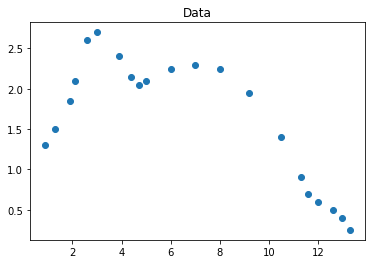

In [10]:
plt.plot(xData,yData, 'o')
plt.title("Data")

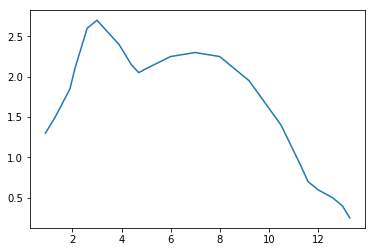

In [11]:
plt.plot(xData,yData)

Text(0.5,1,'Interpolation with Cubic Spline')

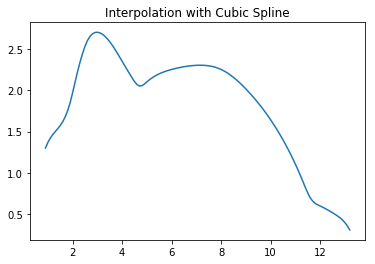

In [12]:
cs = CubicSpline(xData, yData)
xs = np.arange(0.9, 13.3, 0.1)
plt.plot(xs,cs(xs), )
plt.title("Interpolation with Cubic Spline")